In [257]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Flatten, Activation, MaxPool2D, AvgPool2D, Conv2D, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

array([[[68, 55, 69],
        [71, 62, 75],
        [79, 75, 87],
        ...,
        [51, 49, 78],
        [50, 48, 77],
        [50, 48, 77]],

       [[71, 60, 76],
        [71, 64, 79],
        [74, 71, 86],
        ...,
        [53, 51, 80],
        [53, 51, 80],
        [53, 51, 80]],

       [[72, 66, 83],
        [71, 68, 84],
        [70, 70, 88],
        ...,
        [55, 53, 82],
        [55, 53, 82],
        [55, 53, 82]],

       ...,

       [[24, 30, 25],
        [23, 29, 24],
        [22, 28, 23],
        ...,
        [29, 38, 28],
        [29, 37, 27],
        [28, 36, 26]],

       [[24, 30, 25],
        [23, 29, 24],
        [22, 28, 23],
        ...,
        [31, 39, 28],
        [30, 38, 27],
        [29, 37, 26]],

       [[23, 29, 24],
        [23, 29, 24],
        [22, 28, 23],
        ...,
        [31, 39, 28],
        [30, 38, 27],
        [29, 37, 26]]], dtype=uint8)

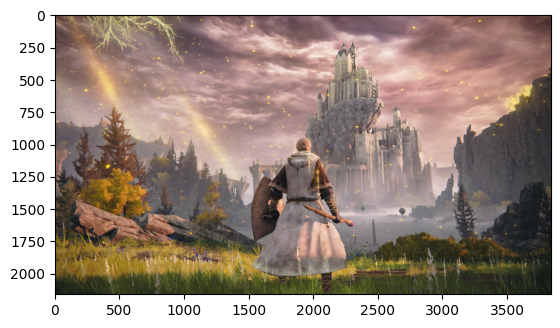

In [258]:
img = image.load_img("testset/castleTest.png")
plt.imshow(img)

cv2.imread("testset/castleTest.png")


In [259]:
train = ImageDataGenerator(1/255)
validation = ImageDataGenerator(1/255)


train_dataset = train.flow_from_directory('trainsets/', 
                                          target_size= (400, 400),
                                          batch_size= 3, 
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory('ValidationSet/', 
                                          target_size= (400, 400),
                                          batch_size= 3, 
                                          class_mode = 'binary')

train_dataset.class_indices
train_dataset.classes

Found 31 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [260]:
model = Sequential()
model.add(Conv2D(16, (3, 3),activation = 'relu' ,input_shape=(400, 400, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [261]:
model.compile(loss= 'binary_crossentropy',
              optimizer= RMSprop(learning_rate=0.0001),
              metrics = ['accuracy'])

In [262]:
model_fit = model.fit(train_dataset, 
                      batch_size=3,
                      epochs=10, 
                      validation_data=validation_dataset)


c:\Users\lucvd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10


c:\Users\lucvd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 656ms/step - accuracy: 0.5262 - loss: 356.0011 - val_accuracy: 0.5000 - val_loss: 167.6039
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 588ms/step - accuracy: 0.5558 - loss: 110.4142 - val_accuracy: 0.5000 - val_loss: 27.0894
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 567ms/step - accuracy: 0.5343 - loss: 34.3355 - val_accuracy: 0.8000 - val_loss: 5.7828
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 597ms/step - accuracy: 0.8757 - loss: 10.9727 - val_accuracy: 0.8000 - val_loss: 4.1673
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 554ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9000 - val_loss: 1.2064
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 573ms/step - accuracy: 1.0000 - loss: 8.0927e-16 - val_accuracy: 0.9000 - val_loss: 1.2064
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 558ms/step - accuracy: 1.0000 - loss: 5.0899e-15 - val_accuracy: 0.9000 - val_loss: 1.2064
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 549ms/step - accuracy: 1.0000 - loss: 3.7267e-16 - val_a

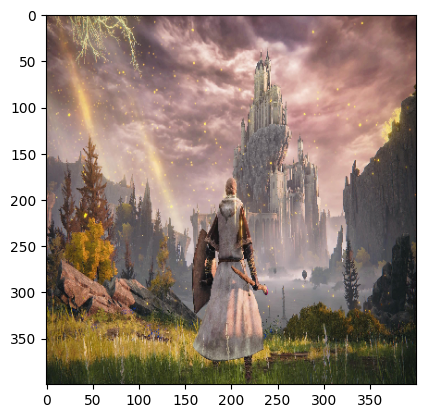

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
it be minecraft


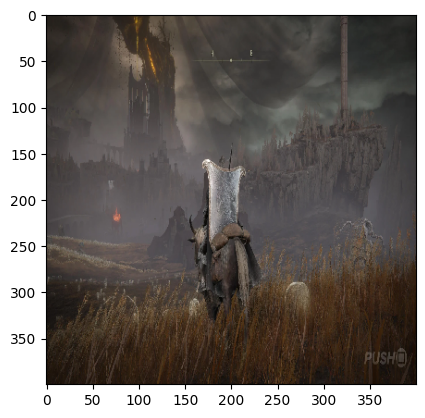

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
it be minecraft


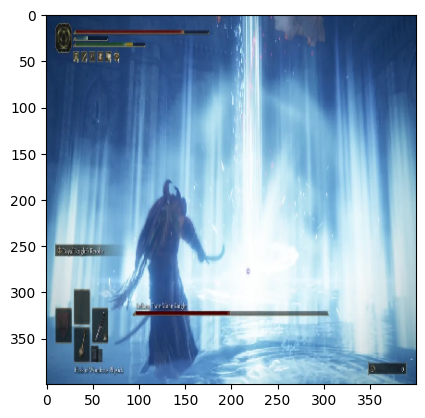

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
it be minecraft


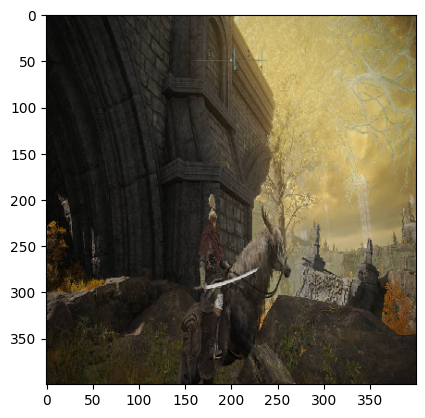

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
it be eldenring


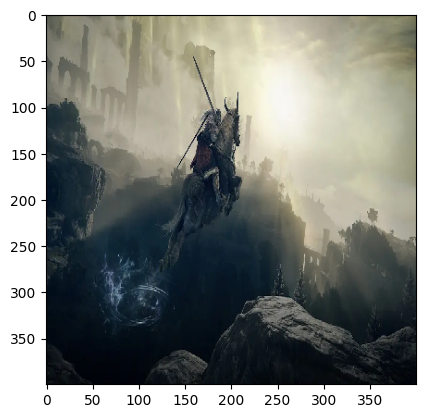

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
it be minecraft


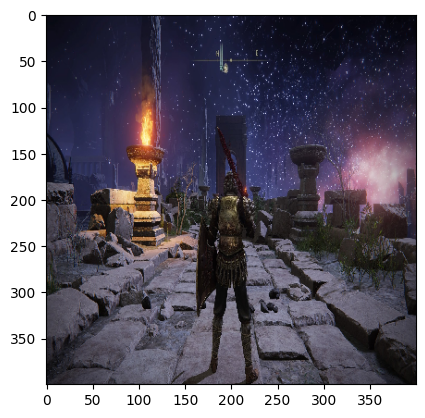

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
it be minecraft


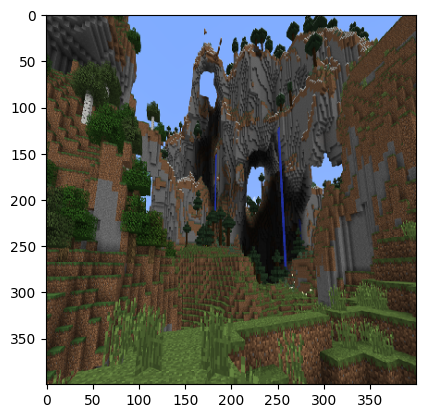

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
it be minecraft


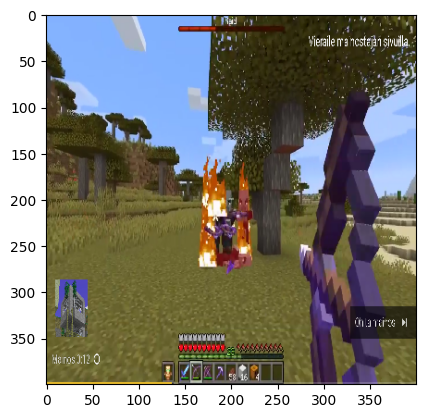

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
it be minecraft


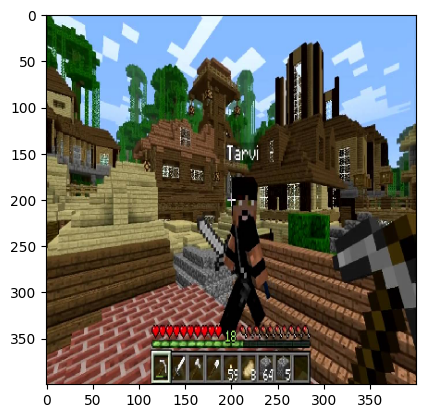

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
it be minecraft


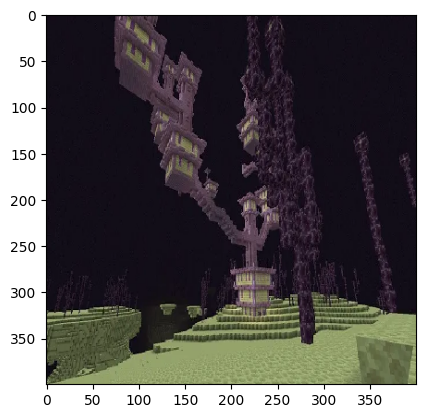

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
it be minecraft


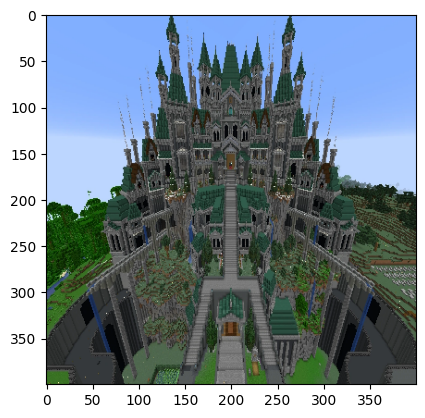

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
it be minecraft


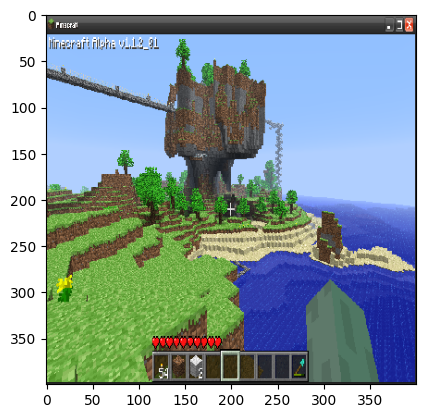

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
it be minecraft


In [263]:
dir_path = "testset/"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + i, target_size=(400, 400))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    value = model.predict(images)
    if(value == 0 ):
        print("it be eldenring")
    else:
        print("it be minecraft")

    

In [264]:
# Predict on the validation data
predictions = model.predict(validation_dataset)
predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()

# Get true labels
true_classes = validation_dataset.classes
class_labels = list(validation_dataset.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print(classification_report(true_classes, predicted_classes))
print(cm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.33      0.40      0.36         5

    accuracy                           0.30        10
   macro avg       0.29      0.30      0.29        10
weighted avg       0.29      0.30      0.29        10

[[1 4]
 [3 2]]
